In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy
df = pd.read_csv('SBAnational.csv')

df.head(5)


C:\Users\socci\AppData\Local\Temp\ipykernel_19200\4237066746.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SBAnational.csv')


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [4]:
df.shape

(899164, 27)

In [5]:
df['BalanceGross'].unique()

array(['$0.00 ', '$12,750.00 ', '$827,875.00 ', '$25,000.00 ',
       '$37,100.00 ', '$43,127.00 ', '$84,617.00 ', '$1,760.00 ',
       '$115,820.00 ', '$996,262.00 ', '$395,476.00 ', '$41,509.00 ',
       '$600.00 ', '$9,111.00 ', '$96,908.00 '], dtype=object)

In [6]:
# 1 useless 5
# 2 non
# city et state oui 
# je sais pas bank name, fiscal year of com
# 1 2 6 10 7 15 16 17 21 22 25 26

#c

In [7]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [8]:
df = df.drop(['LoanNr_ChkDgt','Name','City','Bank', 'ApprovalDate', 'ApprovalFY','ChgOffDate','DisbursementDate', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr' 	], axis=1)

In [9]:
df.columns

Index(['State', 'Zip', 'BankState', 'NAICS', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'MIS_Status', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [10]:


df.isna().sum()

State              14
Zip                 0
BankState        1566
NAICS               0
Term                0
NoEmp               0
NewExist          136
CreateJob           0
RetainedJob         0
FranchiseCode       0
UrbanRural          0
RevLineCr        4528
LowDoc           2582
MIS_Status       1997
GrAppv              0
SBA_Appv            0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.isna().sum()

State            0
Zip              0
BankState        0
NAICS            0
Term             0
NoEmp            0
NewExist         0
CreateJob        0
RetainedJob      0
FranchiseCode    0
UrbanRural       0
RevLineCr        0
LowDoc           0
MIS_Status       0
GrAppv           0
SBA_Appv         0
dtype: int64

In [13]:
df.shape


(888421, 16)

In [14]:
df.duplicated().sum()


936

In [15]:
df = df.drop_duplicates()
df.shape

(887485, 16)

In [16]:
df.head()

,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,84,4,2.0,0,0,1,0,N,Y,P I F,"$60,000.00","$48,000.00"
1,IN,46526,IN,722410,60,2,2.0,0,0,1,0,N,Y,P I F,"$40,000.00","$32,000.00"
2,IN,47401,IN,621210,180,7,1.0,0,0,1,0,N,N,P I F,"$287,000.00","$215,250.00"
3,OK,74012,OK,0,60,2,1.0,0,0,1,0,N,Y,P I F,"$35,000.00","$28,000.00"
4,FL,32801,FL,0,240,14,1.0,7,7,1,0,N,N,P I F,"$229,000.00","$229,000.00"


In [17]:
#enlever les lignes ou le naics est à 0
nombre_zeros_naics = (df['NAICS'] == 0).sum()
nombre_zeros_naics

198413

In [18]:
#enlever les lignes ou le naics est à 0
#df = df[df['NAICS'] != 0]

In [19]:
df.shape

(887485, 16)

In [20]:
df.dtypes

State             object
Zip                int64
BankState         object
NAICS              int64
Term               int64
NoEmp              int64
NewExist         float64
CreateJob          int64
RetainedJob        int64
FranchiseCode      int64
UrbanRural         int64
RevLineCr         object
LowDoc            object
MIS_Status        object
GrAppv            object
SBA_Appv          object
dtype: object

In [21]:
#replace dollar et convertir en float
df['GrAppv'] = df['GrAppv'].replace('[\$,]', '', regex=True).astype(float)
df['SBA_Appv'] = df['SBA_Appv'].replace('[\$,]', '', regex=True).astype(float)

In [22]:
df.to_csv('dataset_test.csv', index=False)
df.head()

,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,84,4,2.0,0,0,1,0,N,Y,P I F,60000.0,48000.0
1,IN,46526,IN,722410,60,2,2.0,0,0,1,0,N,Y,P I F,40000.0,32000.0
2,IN,47401,IN,621210,180,7,1.0,0,0,1,0,N,N,P I F,287000.0,215250.0
3,OK,74012,OK,0,60,2,1.0,0,0,1,0,N,Y,P I F,35000.0,28000.0
4,FL,32801,FL,0,240,14,1.0,7,7,1,0,N,N,P I F,229000.0,229000.0


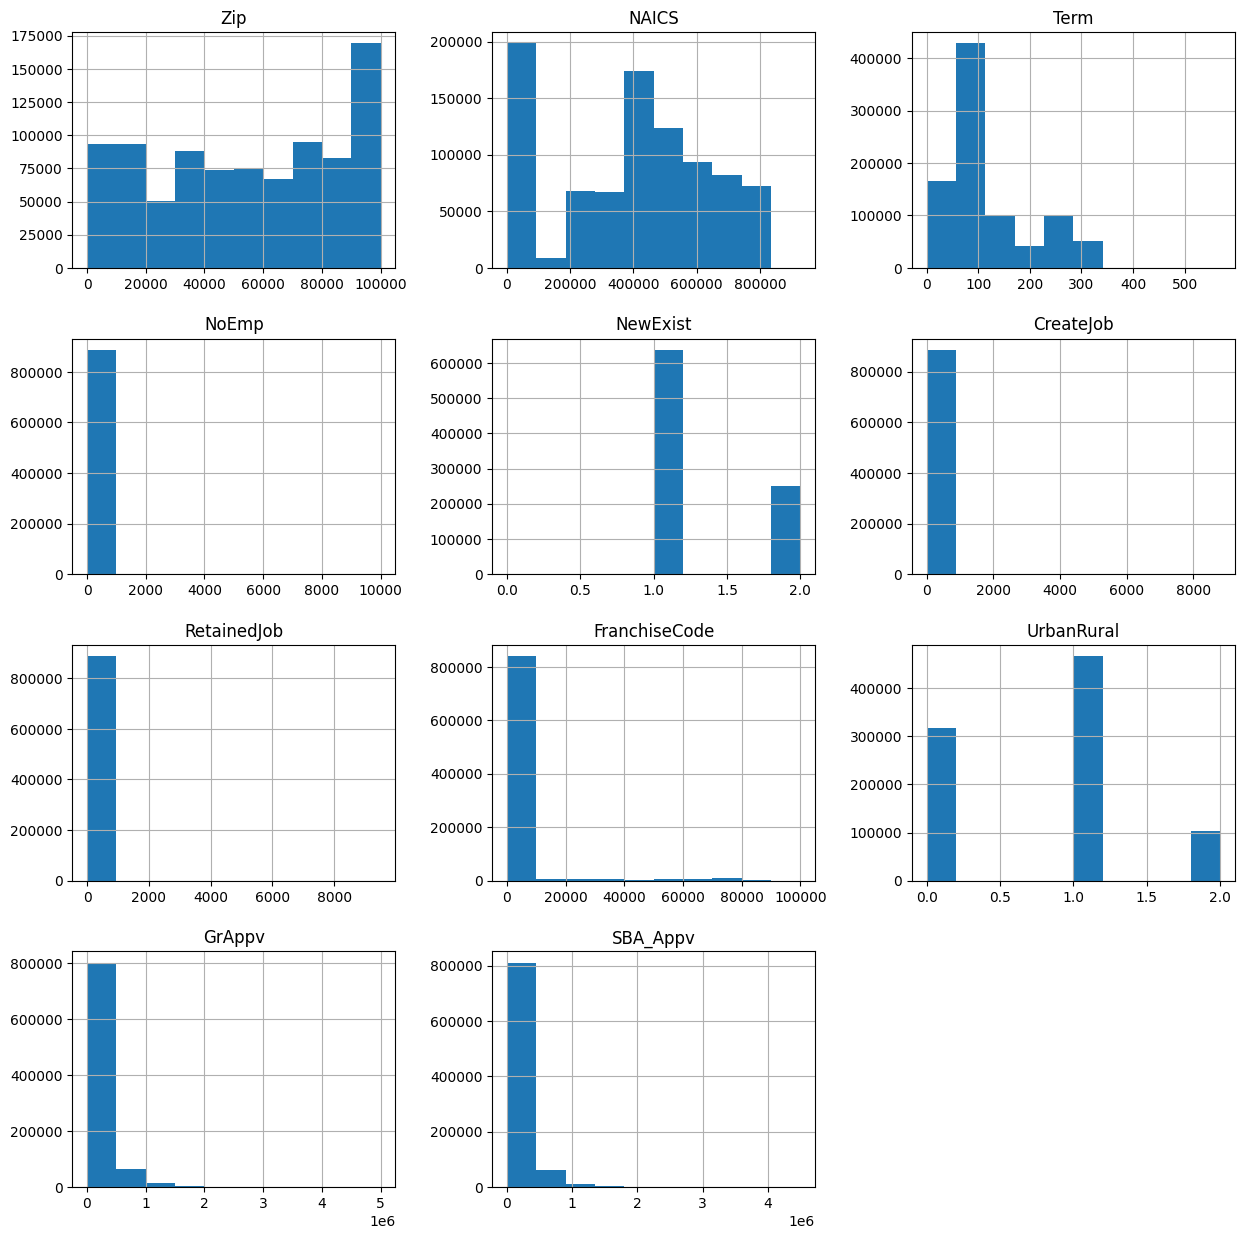

In [23]:
df.hist(figsize = (15,15));

In [24]:
#target proportion 
df['MIS_Status'].value_counts()


MIS_Status
P I F     731137
CHGOFF    156348
Name: count, dtype: int64

<Axes: >

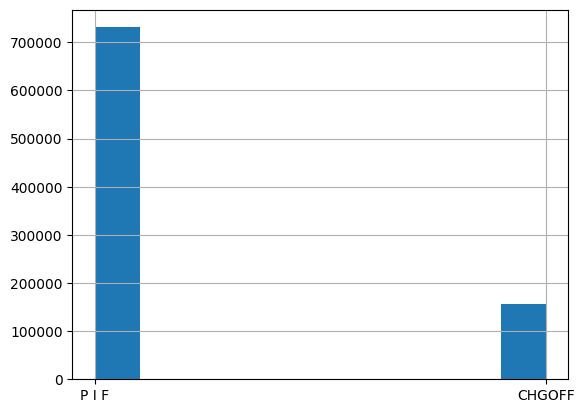

In [25]:
df['MIS_Status'].hist()

In [26]:
df.head()

,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,84,4,2.0,0,0,1,0,N,Y,P I F,60000.0,48000.0
1,IN,46526,IN,722410,60,2,2.0,0,0,1,0,N,Y,P I F,40000.0,32000.0
2,IN,47401,IN,621210,180,7,1.0,0,0,1,0,N,N,P I F,287000.0,215250.0
3,OK,74012,OK,0,60,2,1.0,0,0,1,0,N,Y,P I F,35000.0,28000.0
4,FL,32801,FL,0,240,14,1.0,7,7,1,0,N,N,P I F,229000.0,229000.0


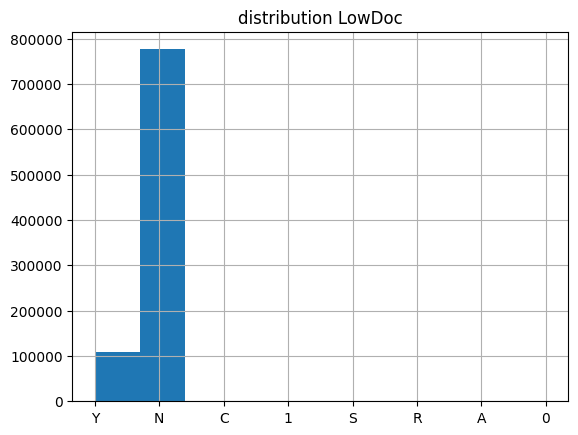

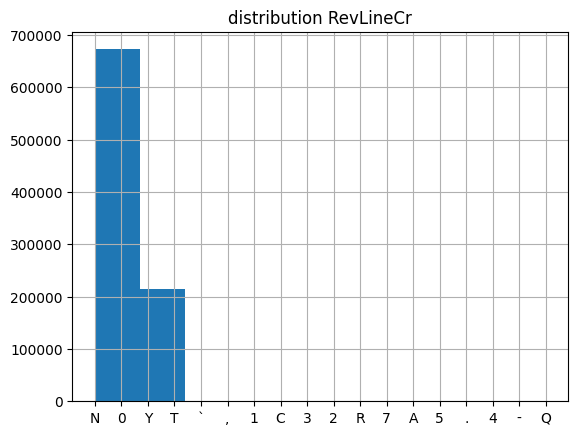

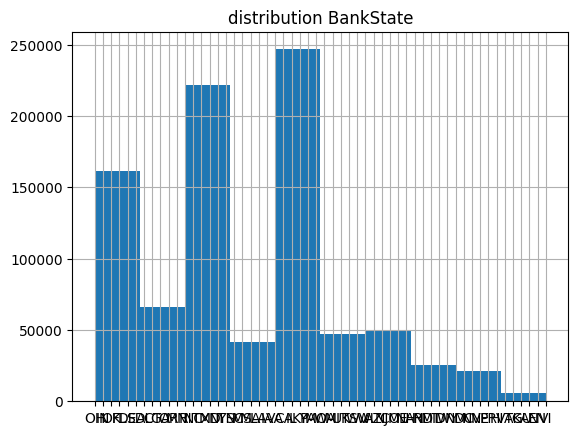

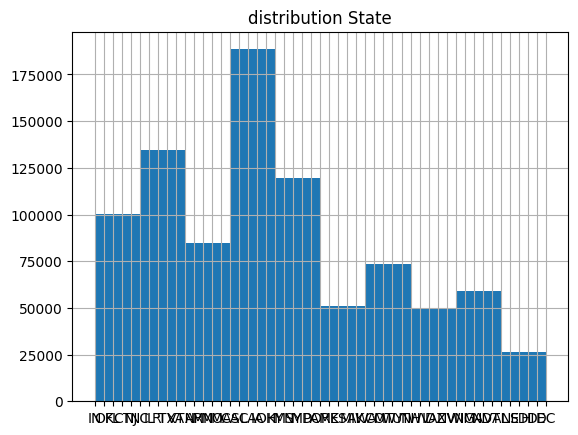

In [27]:
cat_col = ['LowDoc', 'RevLineCr', 'BankState', 'State']

for col in cat_col:
    df[col].hist()
    plt.title(f'distribution {col}')
    plt.show()

Zip                 Axes(0.125,0.712609;0.227941x0.167391)
NAICS            Axes(0.398529,0.712609;0.227941x0.167391)
Term             Axes(0.672059,0.712609;0.227941x0.167391)
NoEmp               Axes(0.125,0.511739;0.227941x0.167391)
NewExist         Axes(0.398529,0.511739;0.227941x0.167391)
CreateJob        Axes(0.672059,0.511739;0.227941x0.167391)
RetainedJob          Axes(0.125,0.31087;0.227941x0.167391)
FranchiseCode     Axes(0.398529,0.31087;0.227941x0.167391)
UrbanRural        Axes(0.672059,0.31087;0.227941x0.167391)
GrAppv                  Axes(0.125,0.11;0.227941x0.167391)
SBA_Appv             Axes(0.398529,0.11;0.227941x0.167391)
dtype: object

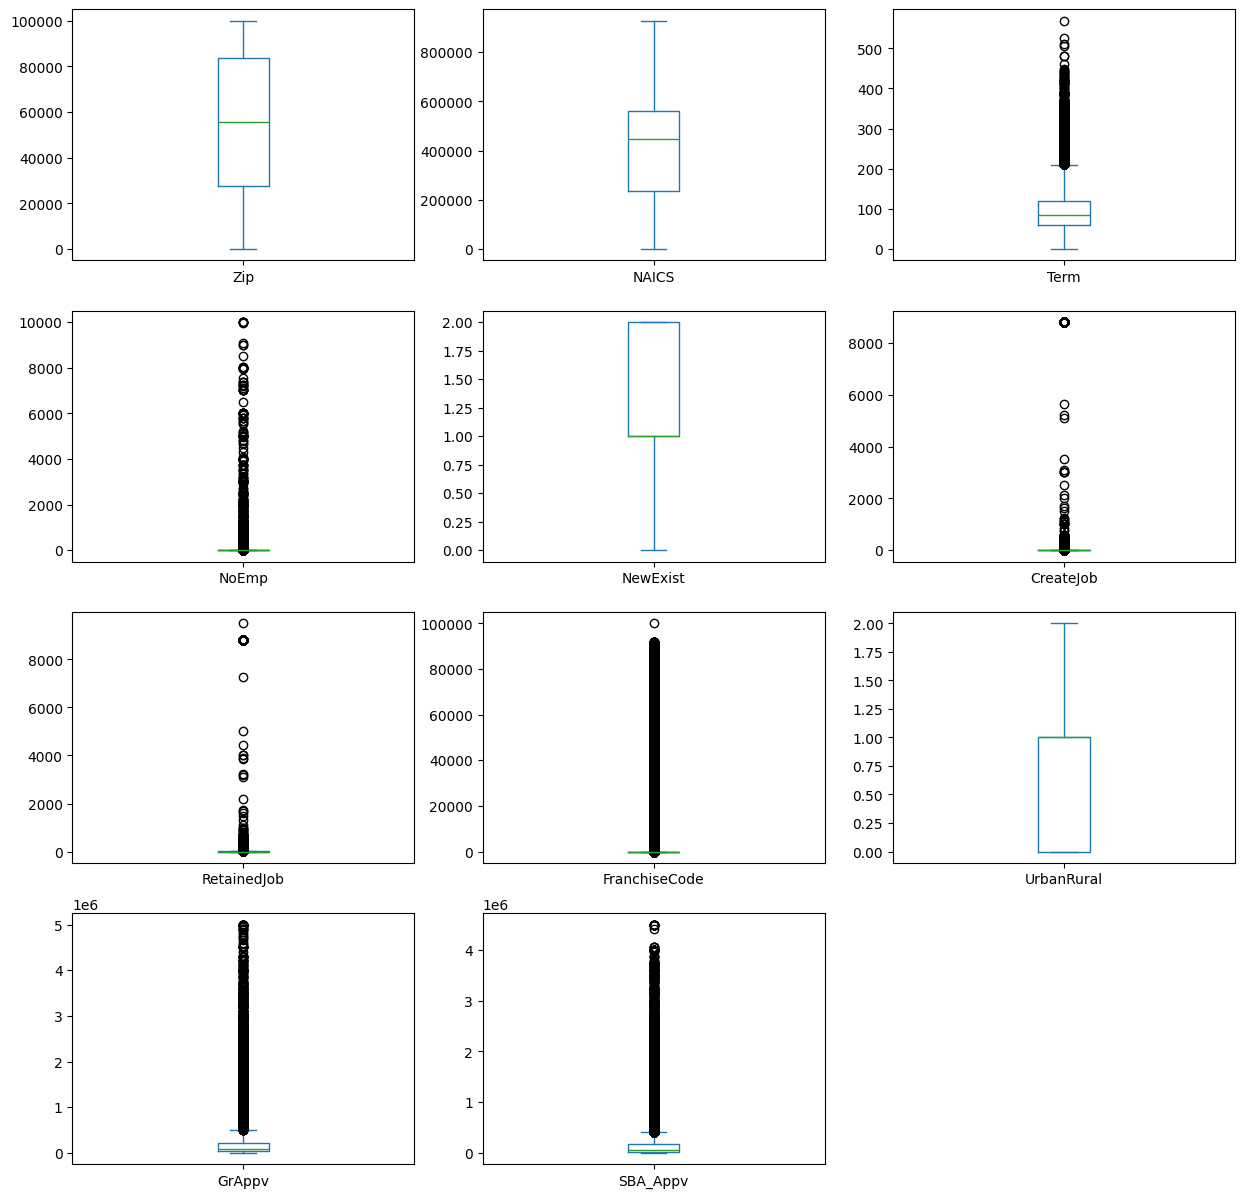

In [28]:
df.plot(kind='box',
          subplots=True,
          layout=(4,3),
          sharex= False, #share x -> le meme x donc le desactiver
          figsize = (15,15) #regler la taille des plots
          )

In [29]:
cat_col = ['LowDoc', 'RevLineCr', 'BankState', 'State']

for col in cat_col:
    print(df[col].value_counts())
    

LowDoc
N    776454
Y    107866
0      1236
C       757
S       602
A       495
R        74
1         1
Name: count, dtype: int64
RevLineCr
N    415483
0    257261
Y    199507
T     15169
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: count, dtype: int64
BankState
CA    116782
NC     78963
IL     65309
OH     58028
SD     50700
TX     47267
RI     43974
NY     39247
VA     28802
DE     24408
MN     19777
UT     18865
PA     16896
WI     15244
MO     14673
MA     13655
FL     13654
GA     13639
AL     11986
OR     11165
WA     10564
CO     10456
CT      9822
IA      9729
NJ      9353
KS      8749
MT      7731
IN      7528
SC      7426
MI      7278
OK      7233
MD      6925
NH      6700
AR      6222
MS      5843
TN      5553
NE      5264
ND      5025
LA      5008
VT      4691
NM      4342
KY      4307
NV      4305
ID      4261
DC      3963
AZ      3913
ME      363

In [30]:
df2 = df.copy()


df2.head()


,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,84,4,2.0,0,0,1,0,N,Y,P I F,60000.0,48000.0
1,IN,46526,IN,722410,60,2,2.0,0,0,1,0,N,Y,P I F,40000.0,32000.0
2,IN,47401,IN,621210,180,7,1.0,0,0,1,0,N,N,P I F,287000.0,215250.0
3,OK,74012,OK,0,60,2,1.0,0,0,1,0,N,Y,P I F,35000.0,28000.0
4,FL,32801,FL,0,240,14,1.0,7,7,1,0,N,N,P I F,229000.0,229000.0


In [31]:
#enlever les lignes ou le naics est à 0
df2 = df2[df2['NAICS'] != 0]

df2 = df2[df2['NewExist'] != 0]


In [32]:
df2['NewExist'].unique()

array([2., 1.])

In [33]:
df2['RevLineCr'].unique()

array(['N', 'Y', '0', 'T', '`', ',', '1', 'C', '2', 'R', '7', 'A', '-',
       'Q'], dtype=object)

In [34]:
df2['RevLineCr'].value_counts()

RevLineCr
N    266528
0    213906
Y    193324
T     14541
1        14
R        14
`         5
2         5
C         2
,         1
7         1
A         1
-         1
Q         1
Name: count, dtype: int64

In [35]:
df2['LowDoc'].unique()

array(['Y', 'N', 'C', '1', 'S', 'R', 'A', '0'], dtype=object)

In [36]:
df2['LowDoc'].value_counts()

LowDoc
N    619874
Y     66133
C       615
S       602
0       550
A       495
R        74
1         1
Name: count, dtype: int64

In [37]:
valeur_enlever = ['`', ',', '1', 'C', '2', 'R', '7', 'A', '-', 'Q']

for col in valeur_enlever:
    df2 = df2[df2['RevLineCr'] != col] 



In [38]:
df2['RevLineCr'].value_counts()

RevLineCr
N    266528
0    213906
Y    193324
T     14541
Name: count, dtype: int64

In [39]:
import numpy as np
df2['RevLineCr'] = df2['RevLineCr'].replace('T', np.nan)
df2['RevLineCr'] = df2['RevLineCr'].replace('0', np.nan)

In [40]:
df2['RevLineCr'].unique()

array(['N', 'Y', nan], dtype=object)

In [41]:
df2['LowDoc'].value_counts()

LowDoc
N    619840
Y     66122
C       615
S       602
0       550
A       495
R        74
1         1
Name: count, dtype: int64

In [42]:
valeur_enlever = ['C', '1', 'S', 'R', 'A', '0']

for col in valeur_enlever:
    df2 = df2[df2['LowDoc'] != col] 

In [43]:
df2['LowDoc'].unique()

array(['Y', 'N'], dtype=object)

In [44]:
df2['NewExist'].unique()

array([2., 1.])

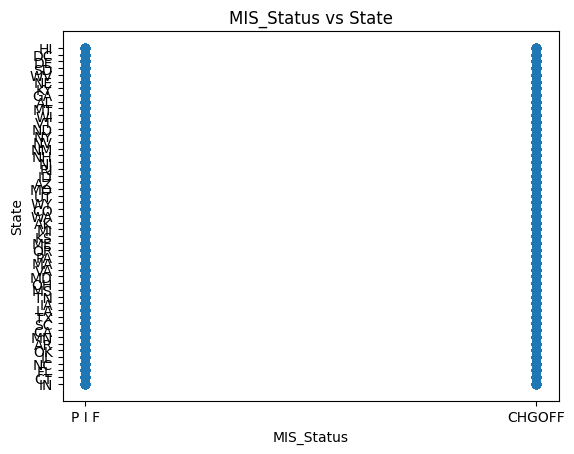

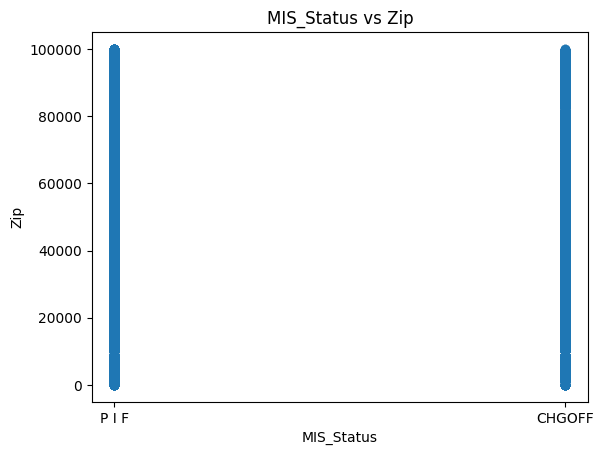

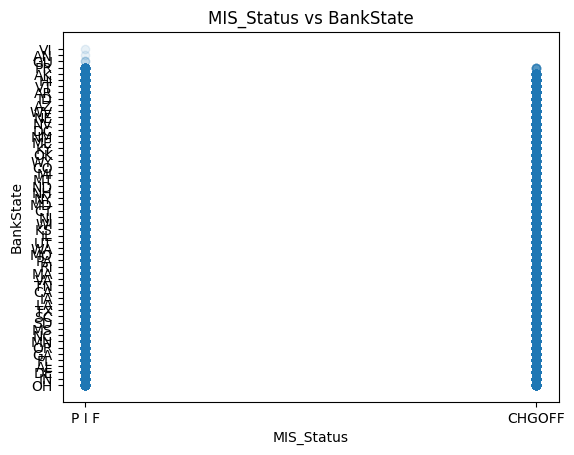

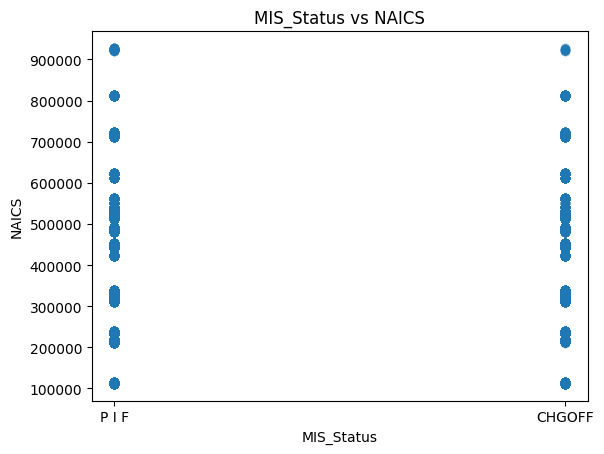

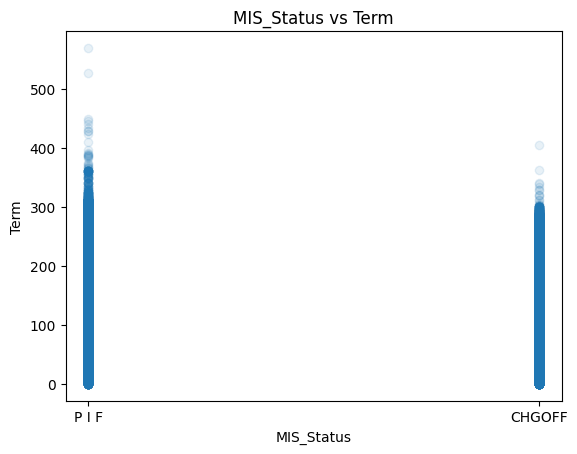

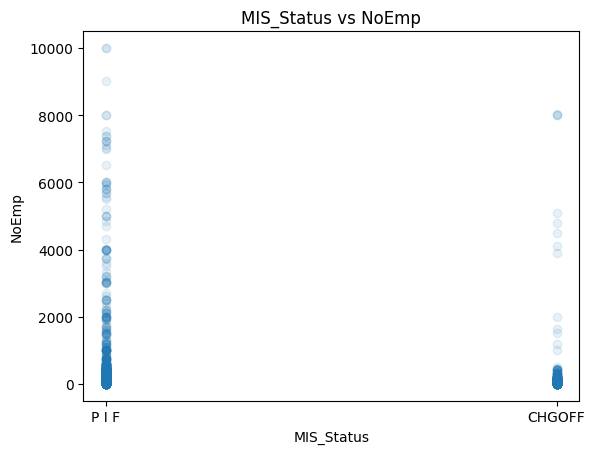

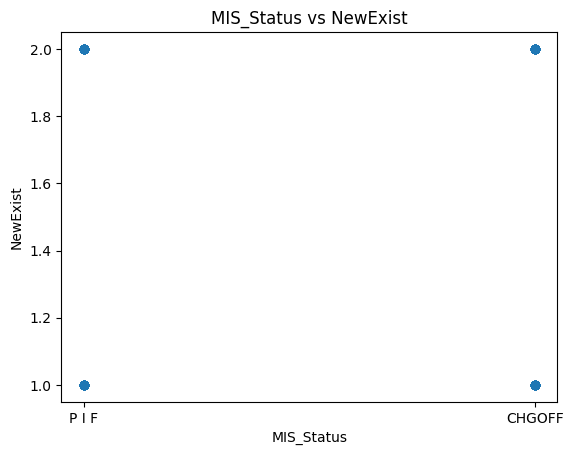

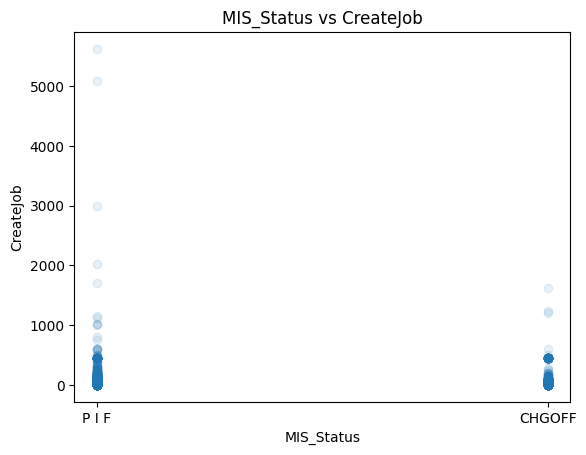

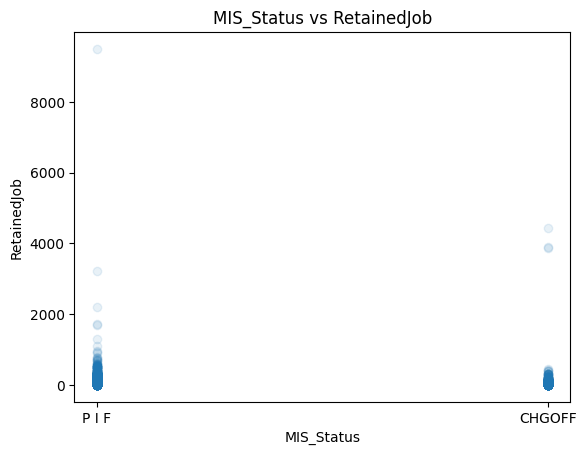

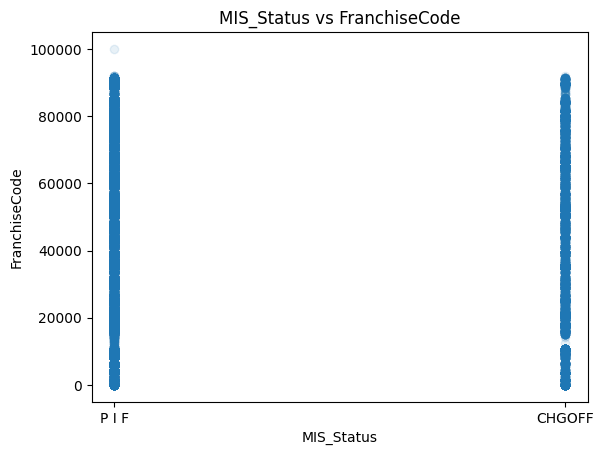

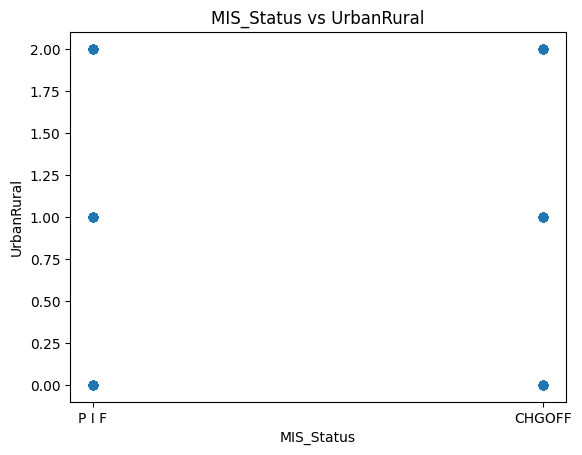

TypeError: 'value' must be an instance of str or bytes, not a float

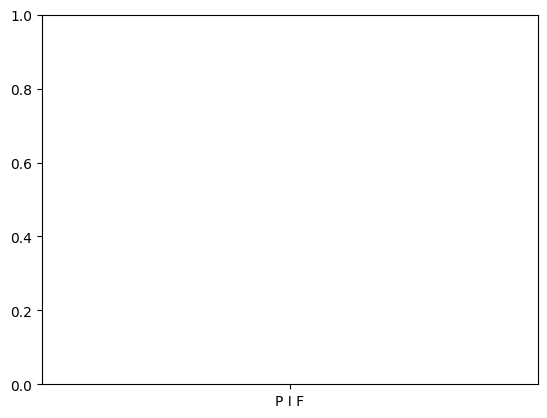

In [45]:
data_cols = df2.columns

for col in data_cols:

    plt.scatter(x=df2['MIS_Status'], y=df2[col], alpha=0.1)
    plt.xlabel('MIS_Status')
    plt.ylabel(col)
    plt.title(f'MIS_Status vs {col}')
    plt.show()

In [ ]:
df2.shape

(685962, 16)

In [ ]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#anova target et naics
f_value, p_value = stats.f_oneway(*[df2[df2['MIS_Status'] == val]['NAICS'] for val in df['MIS_Status'].unique()])

print('F-value:', f_value)
print('P-value:', p_value)

F-value: 1.521554789058162
P-value: 0.21738478147837037


Text(0.5, 1.0, 'MIS_Status vs LowDoc')

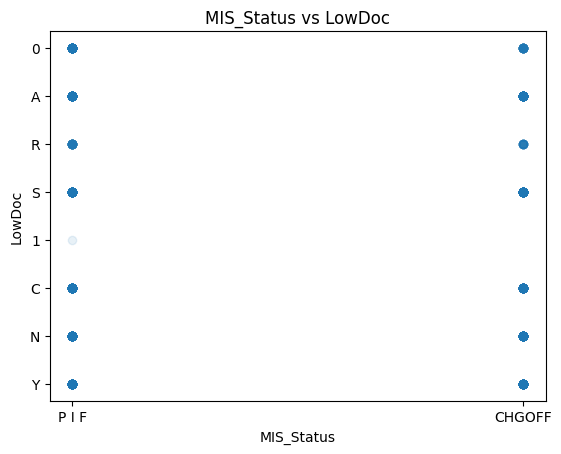

In [ ]:
plt.scatter(x=df['MIS_Status'], y=df['LowDoc'], alpha=0.1)
plt.xlabel('MIS_Status')
plt.ylabel('LowDoc')
plt.title('MIS_Status vs LowDoc')

In [ ]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#ANOVA target et NAICS
f_value, p_value = stats.f_oneway(*[df[df['MIS_Status'] == region]['NAICS'] for region in df['MIS_Status'].unique()])

print('F-value:', f_value)
print('P-value:', p_value)

F-value: 9876.76081837434
P-value: 0.0


In [ ]:
from scipy.stats import chi2_contingency
#test du chi carré pour analyser les corrélations de deux features categorielles 
contingency_table = pd.crosstab(df['MIS_Status'], df['LowDoc'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2, p, dof, expected, contingency_table

(6679.695440388954,
 0.0,
 7,
 array([[2.17745796e+02, 1.76169738e-01, 8.72040203e+01, 1.33360492e+02,
         1.36787698e+05, 1.30365606e+01, 1.06054182e+02, 1.90027250e+04],
        [1.01825420e+03, 8.23830262e-01, 4.07795980e+02, 6.23639508e+02,
         6.39666302e+05, 6.09634394e+01, 4.95945818e+02, 8.88632750e+04]]),
 LowDoc         0  1    A    C       N   R    S      Y
 MIS_Status                                           
 CHGOFF        43  0  159   75  145921  25  270   9855
 P I F       1193  1  336  682  630533  49  332  98011)

In [ ]:
from scipy.stats import chi2_contingency
#test du chi carré pour analyser les corrélations de deux features categorielles 
contingency_table = pd.crosstab(df['MIS_Status'], df['RevLineCr'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2, p, dof, expected, contingency_table

(19176.505422624858,
 0.0,
 17,
 array([[1.76169738e-01, 1.76169738e-01, 1.76169738e-01, 4.53216030e+04,
         4.05190398e+00, 1.05701843e+00, 1.76169738e-01, 1.76169738e-01,
         1.76169738e-01, 1.76169738e-01, 1.76169738e-01, 3.52339476e-01,
         7.31955313e+04, 1.76169738e-01, 2.46637633e+00, 2.67231876e+03,
         3.51470959e+04, 1.93786712e+00],
        [8.23830262e-01, 8.23830262e-01, 8.23830262e-01, 2.11939397e+05,
         1.89480960e+01, 4.94298157e+00, 8.23830262e-01, 8.23830262e-01,
         8.23830262e-01, 8.23830262e-01, 8.23830262e-01, 1.64766052e+00,
         3.42287469e+05, 8.23830262e-01, 1.15336237e+01, 1.24966812e+04,
         1.64359904e+05, 9.06213288e+00]]),
 RevLineCr   ,  -  .       0   1  2  3  4  5  7  A  C       N  Q   R     T  \
 MIS_Status                                                                  
 CHGOFF      0  0  0   38486   2  0  0  0  0  0  0  0   60527  0   1  6543   
 P I F       1  1  1  218775  21  6  1  1  1  1  1  2  354956  1

In [53]:
df4 = df2.copy()
df4['MIS_Status'] = df4['MIS_Status'].replace({'P I F': 1, 'CHGOFF': 0})

df4.head()

,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,84,4,2.0,1,0,N,Y,1,60000.0,48000.0
1,IN,46526,IN,722410,60,2,2.0,1,0,N,Y,1,40000.0,32000.0
2,IN,47401,IN,621210,180,7,1.0,1,0,N,N,1,287000.0,215250.0
5,CT,6062,DE,332721,120,19,1.0,1,0,N,N,1,517000.0,387750.0
7,FL,34491,AL,811118,84,1,2.0,1,0,N,Y,1,45000.0,36000.0


In [54]:

df_num  = df4.select_dtypes(include=['int64', 'float64'])
# Séparer les features de la variable cible
X = df_num.drop('MIS_Status', axis = 1) #les features
Y = df_num['MIS_Status'] #la variable cible

#rescale les features pour réduire les écarts de dimensions
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler().fit(X)
X_scaled = rbs.transform(X)

#X -> pd.Series, features
#Y -> pd.Series, colonne de variables cibles
#X_scaled -> np.ndarray : matrice de features
# print(X,'\n \n \n \n \n \n',Y, '\n \n \n \n \n \n', X_scaled)




In [55]:
from sklearn.decomposition import PCA

#Créer un objet de type PCA

pca = PCA()
pca.fit(X_scaled)

#obtenir le pourcentage de variance expliqué, ca donne le ranking de nos colonnes
pca.explained_variance_ratio_


array([9.99999407e-01, 5.29926943e-07, 4.42793795e-08, 7.36465918e-09,
       5.05170011e-09, 2.31915627e-09, 1.91280952e-09, 1.32824487e-09,
       4.48679800e-10])

In [56]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_scaled, Y)

#plus c'est élevé, plus c'est utile
importances = forest.feature_importances_
print(importances)
columns = X.columns

print('Importance des features : ')
for score, col in zip(importances, columns):
  print(score, ':', col)

#on créé ensuite le mask a la mano en voyant les resultats pour prendre les meilleurs
# mask = [False, True, False ,False ,False, True, True, True]

# X_ens = X_scaled[:,mask]
# print(X_ens)

[0.10528229 0.07861324 0.55925044 0.04502602 0.00926735 0.0339819
 0.02496675 0.06440035 0.07921165]
Importance des features : 
0.1052822904451176 : Zip
0.07861323907781075 : NAICS
0.5592504425525134 : Term
0.045026024018643106 : NoEmp
0.009267353920962793 : NewExist
0.03398189556526519 : FranchiseCode
0.024966751836735256 : UrbanRural
0.06440035284909731 : GrAppv
0.07921164973385465 : SBA_Appv


In [46]:
df2.shape

df2.to_csv('dataset_test1.csv', index=False)
df2.head()

,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,84,4,2.0,0,0,1,0,N,Y,P I F,60000.0,48000.0
1,IN,46526,IN,722410,60,2,2.0,0,0,1,0,N,Y,P I F,40000.0,32000.0
2,IN,47401,IN,621210,180,7,1.0,0,0,1,0,N,N,P I F,287000.0,215250.0
5,CT,6062,DE,332721,120,19,1.0,0,0,1,0,N,N,P I F,517000.0,387750.0
7,FL,34491,AL,811118,84,1,2.0,0,0,1,0,N,Y,P I F,45000.0,36000.0


In [ ]:
df2.head()

,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,84,4,2.0,0,0,1,0,N,Y,P I F,60000.0,48000.0
1,IN,46526,IN,722410,60,2,2.0,0,0,1,0,N,Y,P I F,40000.0,32000.0
2,IN,47401,IN,621210,180,7,1.0,0,0,1,0,N,N,P I F,287000.0,215250.0
5,CT,6062,DE,332721,120,19,1.0,0,0,1,0,N,N,P I F,517000.0,387750.0
7,FL,34491,AL,811118,84,1,2.0,0,0,1,0,N,Y,P I F,45000.0,36000.0


In [48]:
df2 = df2.drop(['CreateJob','RetainedJob'], axis = 1)


In [ ]:
df2.head()

,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,84,4,2.0,1,0,N,Y,P I F,60000.0,48000.0
1,IN,46526,IN,722410,60,2,2.0,1,0,N,Y,P I F,40000.0,32000.0
2,IN,47401,IN,621210,180,7,1.0,1,0,N,N,P I F,287000.0,215250.0
5,CT,6062,DE,332721,120,19,1.0,1,0,N,N,P I F,517000.0,387750.0
7,FL,34491,AL,811118,84,1,2.0,1,0,N,Y,P I F,45000.0,36000.0


In [49]:
df2.to_csv('dataset_test2.csv', index=False)
df2.head()

,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,84,4,2.0,1,0,N,Y,P I F,60000.0,48000.0
1,IN,46526,IN,722410,60,2,2.0,1,0,N,Y,P I F,40000.0,32000.0
2,IN,47401,IN,621210,180,7,1.0,1,0,N,N,P I F,287000.0,215250.0
5,CT,6062,DE,332721,120,19,1.0,1,0,N,N,P I F,517000.0,387750.0
7,FL,34491,AL,811118,84,1,2.0,1,0,N,Y,P I F,45000.0,36000.0


In [ ]:
df2.shape

(685962, 14)

In [50]:
df3 = df2.drop(['GrAppv', 'SBA_Appv'], axis =1)
df3.to_csv('dataset_test3.csv', index=False)

df3.head(15)

,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status
0,IN,47711,OH,451120,84,4,2.0,1,0,N,Y,P I F
1,IN,46526,IN,722410,60,2,2.0,1,0,N,Y,P I F
2,IN,47401,IN,621210,180,7,1.0,1,0,N,N,P I F
5,CT,6062,DE,332721,120,19,1.0,1,0,N,N,P I F
7,FL,34491,AL,811118,84,1,2.0,1,0,N,Y,P I F
8,FL,32456,FL,721310,297,2,2.0,1,0,N,N,P I F
10,NC,28256,GA,811111,84,1,2.0,1,0,N,Y,P I F
11,IL,60605,OR,235950,60,24,1.0,1,0,N,N,P I F
12,NC,27502,MN,445299,162,2,2.0,15100,1,N,N,P I F
15,OK,73112,NC,421330,12,5,2.0,1,0,N,N,P I F
